# **CVPS20 // Working with Video Data in Python**

*November 17, 2020*

This notebook introduces modules to load frames from video files and concepts of working with data that has a temporal component including basic foreground/background separation techniques.

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import cv2 

In [60]:
plt.rcParams['figure.figsize'] = [10,8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gist_gray'
plt.rcParams['animation.html'] = 'jshtml'

To read in the video data from video format files (e.g., `.mp4`), we will use the [OpenCV](https://opencv.org/) package,

In [4]:
# -- define the file name
fname = "/content/drive/MyDrive/cvps20/data/dot/cctv391.mp4"

# -- create a "capture" of the video
cap = cv2.VideoCapture(fname)

The `VideoCapture` object contains information about the video, but note that the syntax of OpenCV is a bit archaic (and has remnants of `C++` styling, its original design language),

In [6]:
cv2.CAP_PROP_FRAME_COUNT

7

In [5]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

100.0

In [13]:
cap.get(4)

240.0

This frame capture can be read frame by frame using the `.read()` method,

In [14]:
vals = cap.read()

In [23]:
type(vals[1])

numpy.ndarray

This is now a `numpy` array and can be treated as such, with a small catch,

In [50]:
st, fr = cap.read()

In [51]:
fr.shape

(240, 352, 3)

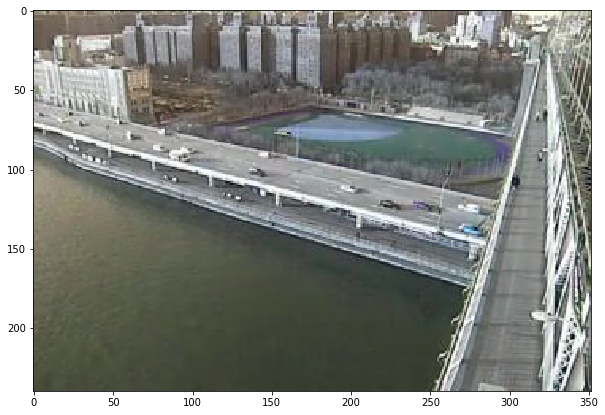

In [61]:
plt.imshow(fr)

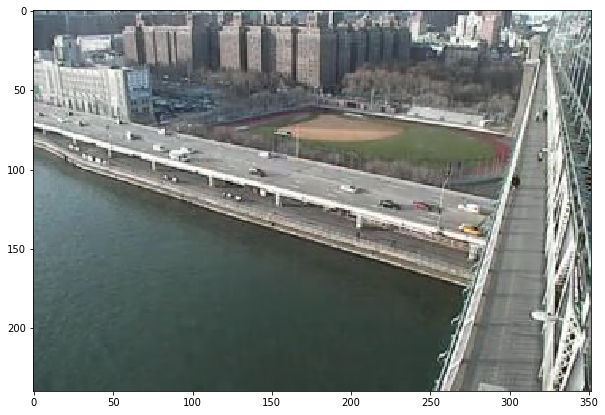

In [63]:
plt.imshow(fr[:,:,::-1])

If we want to read in the whole videos (or the first `N` frames), it's typically best practices to create an empty array, and then load each frame into that array,

In [64]:
# -- create a "capture" of the video
cap = cv2.VideoCapture(fname)

# -- get parameters of the video
nframe = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
nrow = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
ncol = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

# -- create a container for the images
imgs = np.zeros((nframe, nrow, ncol, 3), dtype=float)

# -- loop through frames
for ii in range(nframe):
  imgs[ii] = cap.read()[1][:,:,::-1] / 255

In [65]:
imgs.shape

(100, 240, 352, 3)

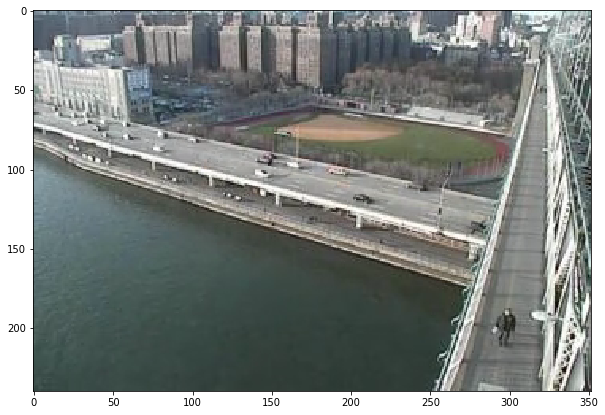

In [67]:
# -- display a frame
fig, ax = plt.subplots()
ax.imshow(imgs[30])

Now let's view the whole video using `matplotlib`'s `animation` sub-module

In [68]:
from matplotlib import animation

In [69]:
# -- define how the animation should be encoded within the HTML
plt.rcParams['animation.html'] = 'jshtml'

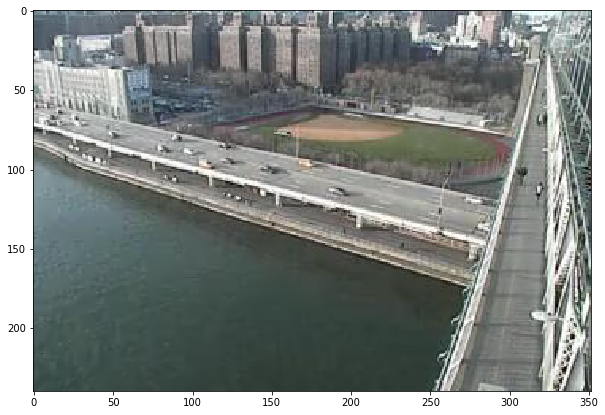

In [72]:
# -- initialize the plot
fig, ax = plt.subplots()
im = ax.imshow(imgs[0])

# -- define a function to modify the plot
def animate(i):
  im.set_data(imgs[i])

# -- create the animation
ani = animation.FuncAnimation(fig, animate, frames=nframe)

In [73]:
ani

Output hidden; open in https://colab.research.google.com to view.

For some of the processing we'll do below, we'll want to consider luminosity images instead of 3 color,

In [ ]:
# -- create the luminosity frames
imgsL = 

Now, let's look at the ***timeseries*** one particular pixel

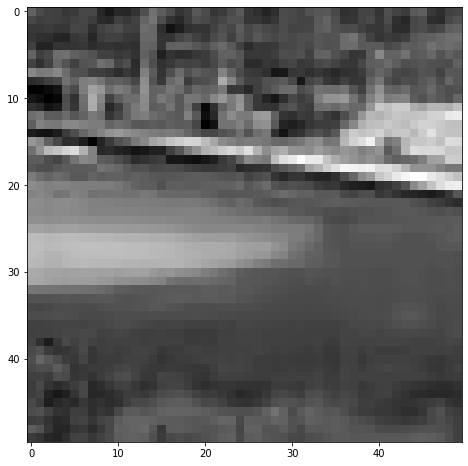

In [76]:
plt.imshow(imgs[0, 50:100, 200:250, 0])

In [37]:
tup1 = ('Google', 'Runoob', np.ones([2,3]))
tup2 = (1, 2, 3, 4, 5, 6, 7 )
 
print ("tup1[0]: ", tup1[0])
print ("tup2[1:5]: ", tup1[1:5])

tup1[0]:  Google
tup2[1:5]:  ('Runoob', array([[1., 1., 1.],
       [1., 1., 1.]]))


In [38]:
tup1[2]

array([[1., 1., 1.],
       [1., 1., 1.]])

In [28]:
type(tup1[2])

numpy.ndarray

In [39]:
tup1[2].reshape(3,2)

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [40]:
tup1

('Google', 'Runoob', array([[1., 1., 1.],
        [1., 1., 1.]]))

In [46]:
a = (5,)

In [47]:
type(a)

tuple

In [48]:
a

(5,)

In [53]:
cap.read?

AttributeError: ignored

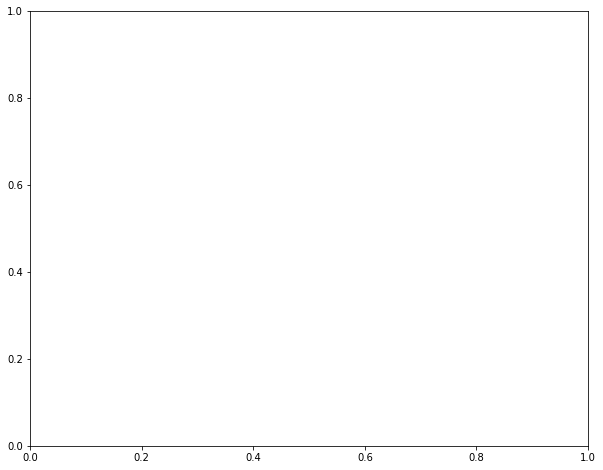

In [71]:
a = np.random.rand(10)

ax, fig = plt.subplots()

im = ax.plot(a)